<a href="https://colab.research.google.com/github/AniketRao/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # CREDIT CARD FRAUD DETECTION
 

#  01.Business Problem.

**1.1 Description**

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

Data: The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

Download creditcard.csv from Kaggle.

**Context:**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by european cardholders.

This dataset presents transactions that occurred in two days

**Problem statement :**

Classify fraudulent and non-fraudulent credit card transactions.

 # 1.2. Real-world/Business objectives and constraints.

No low-latency requirement.

Interpretability is important.

Errors can be very costly.

# 02. Machine Learning Problem Formulation.

# 2.1. Data

**2.1.1. Data Overview**

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud  

We have one data files that contains information about the Credit card transactions

Data file's information: 

Creditcard.csv (V1, V2,....,V28, Time, Amount,Class)

It contains only numerical input variables

**2.2. Mapping the real-world problem to an ML problem**

**2.2.1. Type of Machine Learning Problem**

There are two different classes a credit card transaction can be classified into => classification problem

**2.2.2. Performance Metric**

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud \

Metric(s):

f1-score

Confusion matrix

**2.2.3. Machine Learing Objectives and Constraints**

Objective: Predict which of the two classes the datapoints belong to. 

Constraints: 

Interpretability 

No Latency constraints.

# 03.Data Preprocessing.

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# Loading dataset

In [111]:
data=pd.read_csv('/content/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [112]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [113]:
data.shape

(284807, 31)

In [114]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [115]:
x=data.drop_duplicates(inplace=True)


In [116]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [117]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

**0= "No Fraud Cases"**



**1 = " Fraud Cases"**

# Data States 'No Fraud Cases' =283253 And 'Fraud Cases' = 473 . Hence the class Data is unbalanced so here  data balancing is necessary !

In [118]:
len(data.Class)

283726

# 4.Exploratory Data Analysis

In [119]:
#histplot

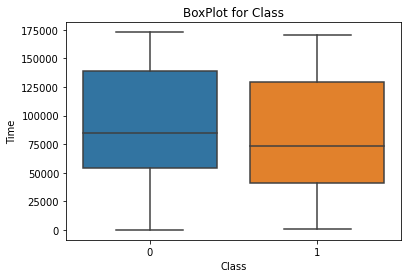

In [120]:
sns.boxplot(x='Class',y='Time',data=data)
plt.title('BoxPlot for Class')
plt.show()

**Fraud and Non Fraud Cases took place at almost same timimg so Time feature is not an important feature for classification**

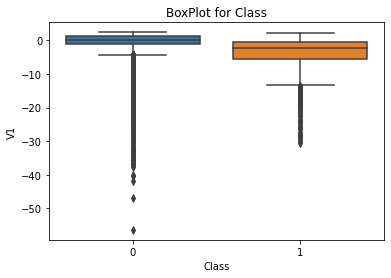

In [121]:
sns.boxplot(x='Class',y='V1',data=data)
plt.title('BoxPlot for Class')
plt.show()

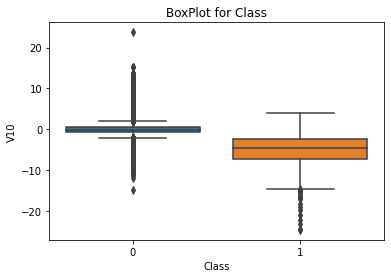

In [122]:
sns.boxplot(x='Class',y='V10',data=data)
plt.title('BoxPlot for Class')
plt.show()

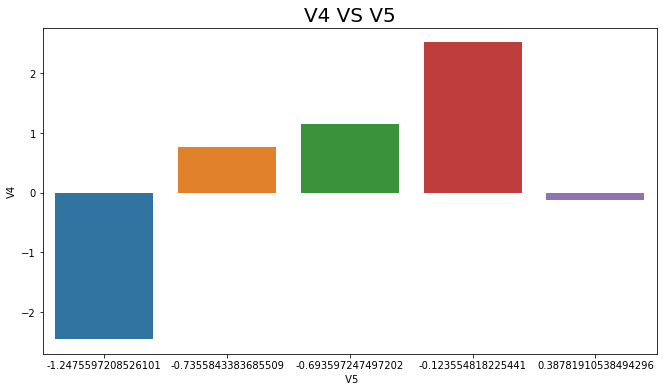

In [123]:
plt.figure(figsize=(11,6))
sns.barplot(x='V5',y='V4',data=data[170:175])
plt.title('V4 VS V5',fontsize=20)
plt.xlabel(' V5')
plt.ylabel('V4')
plt.show()

**From above graph we can commit that both feature V4 and V5 both have positive as well as negative correlation.**

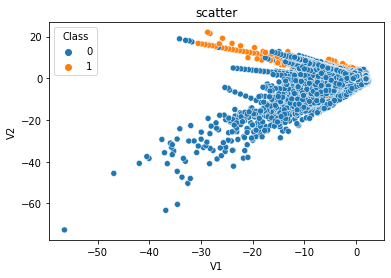

In [124]:
sns.scatterplot(x='V1',y='V2',data=data,hue='Class')
plt.title('scatter')
plt.show()


**1. a=int(input('V2'))**

 **b=int(input('V1'))**

  **if V2>=0 and V1<0:**

  **print('Chances of Fraud Cases')**
    

**2. a=int(input('V2'))**

 **b=int(input('V1'))**

  **if V2<0 and V1<0:**

  **print('No Fraud Cases')**
    

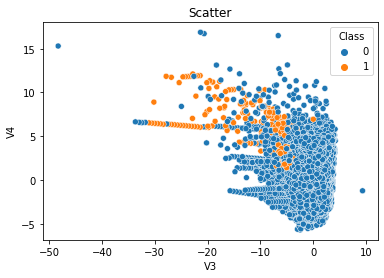

In [125]:
sns.scatterplot(x='V3',y='V4',data=data,hue='Class')
plt.title('Scatter')
plt.show()

**1. a=int(input('V4'))**

   **b=int(input('V3'))**

   **if V4>=1 and V3< -5:**

   **print('Chances of Fraud Cases')**
    

**2. a=int(input('V4'))**

**b=int(input('V3'))**

**if V4<4 and V3<4:**

**print('Chances of No Fraud Cases')**

In [126]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


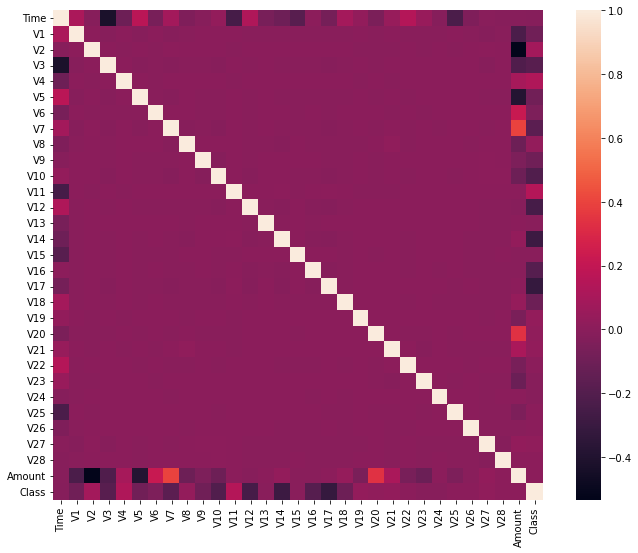

In [127]:
visual=plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),vmax=1,square=True)
plt.show()

**Lighter shades indicates positive correlation.**

**Dark Shades indicates negative correlation.**

# 05. Model Training.

 **Training and Testing Data**


In [128]:
# Getting Features
X=data.drop(columns='Class')
Y=data['Class']

In [129]:
#importing libraries
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

RS=RandomUnderSampler()
x_us,y_us=RS.fit_resample(X , Y)
x_train,x_test,y_train,y_test=train_test_split(x_us,y_us,test_size=0.3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [130]:
len(x_train)

662

In [131]:
len(y_train)

662

In [132]:
len(x_test)

284

In [133]:
len(y_test)

284

In [134]:
# Standard scaler

In [135]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit_transform(x_train)
std.fit(x_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

**01.DECISION TREE**

In [ ]:
## Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

dt=DecisionTreeClassifier()

parameter={'criterion':['gini'],
            'splitter': ['best','random'],
           'max_depth':[2,10,20,25,40,None],
           'min_samples_split':[2,4,5,10,12],
           'min_samples_leaf':[1,2,3,6]}
            
rv=RandomizedSearchCV(dt,parameter)
rv.fit(x_train,y_train)

In [137]:
rv.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'splitter': 'best'}

In [138]:
rv.best_score_

0.9108452950558213

In [139]:
dt= DecisionTreeClassifier(splitter= 'random',
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_depth= 40,
 criterion= 'gini'
)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=40, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [140]:
y_pred=dt.predict(x_test)

In [141]:
#calculation of accuracy score
print('Train Data Score',accuracy_score(y_train,dt.predict(x_train))*100)
print('Test Data Score',accuracy_score(y_test,dt.predict(x_test))*100)

Train Data Score 96.52567975830816
Test Data Score 89.08450704225352


In [142]:
print(confusion_matrix(y_test,y_pred))

[[129  13]
 [ 18 124]]


In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       142
           1       0.91      0.87      0.89       142

    accuracy                           0.89       284
   macro avg       0.89      0.89      0.89       284
weighted avg       0.89      0.89      0.89       284



**Test Accuracy obtained from DECISION TREE is 92.95%**

**02.LOGISTIC REGRESSION**


In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

log_reg=LogisticRegression()

parametre={
    'penalty':['l2'],
    'C':[1.0,2.0,3.0],
    'random_state':[None],
    'solver':['lbfgs'],
    'max_iter':[100,400,600,1000]
}

rv=RandomizedSearchCV(log_reg,parametre)
rv.fit(x_train,y_train)


In [145]:
rv.best_params_

{'C': 1.0,
 'max_iter': 600,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs'}

In [146]:
rv.best_score_

0.9350307587149691

In [ ]:
log_reg=LogisticRegression(solver= 'lbfgs',
 random_state= None,
 penalty= 'l2',
 max_iter= 600,
 C= 1.0)
log_reg.fit(x_train,y_train)

In [148]:
y_pred=log_reg.predict(x_test)

In [149]:
print('Train_Score',accuracy_score(y_train,log_reg.predict(x_train))*100)
print('Test_Score',accuracy_score(y_test,log_reg.predict(x_test))*100)

Train_Score 95.16616314199395
Test_Score 92.25352112676056


In [150]:
print(confusion_matrix(y_test,y_pred))

[[134   8]
 [ 14 128]]


In [151]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       142
           1       0.94      0.90      0.92       142

    accuracy                           0.92       284
   macro avg       0.92      0.92      0.92       284
weighted avg       0.92      0.92      0.92       284



**Test Accuracy obtained from LOGISTIC REGRESSION is 92.60%**

**03.RANDOM FOREST CLASSIFIER**

In [152]:
%%time
from sklearn.ensemble import RandomForestClassifier


random_class=RandomForestClassifier()

para_meter={'n_estimators':[100,200,300,500],
            'criterion':['gini'],
            'max_depth':[3,5,10,20,None],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[1,2,3,4]
    
}

rsv=RandomizedSearchCV(random_class,para_meter,n_jobs=-1)
rsv.fit(x_train,y_train)


CPU times: user 583 ms, sys: 65.5 ms, total: 648 ms
Wall time: 26.2 s


In [153]:
rsv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [154]:
rsv.best_score_

0.9440988835725678

In [155]:
random_class=RandomForestClassifier(n_estimators= 500,
 min_samples_split=10,
 min_samples_leaf=2,
 max_depth= 20,
 criterion= 'gini')
random_class.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [156]:
y_pred=random_class.predict(x_test)

In [157]:
#calculation of accuracy score
print('Train Data Score',accuracy_score(y_train,random_class.predict(x_train))*100)
print('Test Data Score',accuracy_score(y_test,random_class.predict(x_test))*100)

Train Data Score 97.58308157099698
Test Data Score 93.66197183098592


In [158]:
print(confusion_matrix(y_test,y_pred))

[[140   2]
 [ 16 126]]


In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       142
           1       0.98      0.89      0.93       142

    accuracy                           0.94       284
   macro avg       0.94      0.94      0.94       284
weighted avg       0.94      0.94      0.94       284



**Test Accuracy obtained from RANDOM FOREST CLASSIFIER is 94.36%**

**04. KNN Classifier**

In [160]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
KNN=KNeighborsClassifier()
para_meter={'n_neighbors':[3,5,7,10,50,100],
            'weights':[ 'distance'],
            'algorithm':['auto']
            
}

rsv=GridSearchCV(KNN,para_meter)
rsv.fit(x_train,y_train)

CPU times: user 140 ms, sys: 20 µs, total: 140 ms
Wall time: 141 ms


In [161]:
rsv.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

In [162]:
rsv.best_score_

0.6525746183640921

In [163]:
%%time
KNN=KNeighborsClassifier(weights ='distance',
 n_neighbors= 10,
 algorithm= 'auto')
KNN.fit(x_train,y_train)

CPU times: user 3.38 ms, sys: 34 µs, total: 3.41 ms
Wall time: 3.28 ms


In [164]:
#model prediction
y_pred = KNN.predict(x_test)

In [165]:
# Accuracy score of train and test data
print("Train Data",KNN.score(x_train,y_train)*100)
print("Test Data",KNN.score(x_test,y_test)*100)

Train Data 100.0
Test Data 62.323943661971825


In [166]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[80 62]
 [45 97]]


In [167]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.56      0.60       142
           1       0.61      0.68      0.64       142

    accuracy                           0.62       284
   macro avg       0.63      0.62      0.62       284
weighted avg       0.63      0.62      0.62       284



**Test Accuracy obtained from KNN Classifier is 65.49%**

# 06.Conclusion

**Test Accuracy obtained from DECISION TREE is 92.95%**

**Test Accuracy obtained from LOGISTIC REGRESSION is 92.60%**

**Test Accuracy obtained from RANDOM FOREST CLASSIFIER is 94.36%**

**Test Accuracy obtained from KNN Classifier is 65.49%**